In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st 
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split

In [62]:
tk_data = pd.read_csv('~/Desktop/CraftIQ/GitHub/AnnieTracy-TikTok-Analysis/Data/z_RegressionSocialData.csv')
x = tk_data.drop('Profile Views', axis =1)
y = tk_data['Profile Views']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 123)

In [3]:
x_train_p = np.array(x_train)
x_train

,Video Views,Likes,Comments,Shares,Unique Viewers
33,-0.052872,0.026852,-0.055577,-0.029144,-0.082457
51,-0.551792,-0.537170,-0.612073,-0.540562,-0.550754
8,1.679688,2.206835,2.227483,1.949498,1.728406
63,-0.051971,-0.027187,-0.141192,-0.359331,0.008548
89,0.100516,0.010081,0.096627,-0.106105,0.117276
...,...,...,...,...,...
86,0.005414,-0.131537,-0.450356,-0.480979,0.049400
57,-0.551404,-0.512063,-0.526458,-0.555457,-0.517131
83,0.048273,-0.065534,-0.288640,-0.264992,0.026558
17,-0.179523,-0.200581,-0.212538,-0.230235,-0.226195


In [4]:
y_train_p = np.array(y_train).ravel()

In [5]:
y_train

33    2016
51     620
8     6028
63    1346
89    1945
      ... 
86    1687
57     441
83    1820
17    1572
66     577
Name: Profile Views, Length: 82, dtype: int64

In [6]:
y_test.count()

10

In [7]:
x_test.count()

Video Views       10
Likes             10
Comments          10
Shares            10
Unique Viewers    10
dtype: int64

In [8]:
x_train.count()

Video Views       82
Likes             82
Comments          82
Shares            82
Unique Viewers    82
dtype: int64

In [9]:
y_train.count()

82

In [10]:
lasso_cv = LassoCV() #lasso_cv is the container for parameter m and c in y=mX+c

lasso_cv.fit(x_train_p , y_train_p) #training part to get m and c (least squares)

LassoCV()

In [11]:
b = lasso_cv.intercept_.round(0)
w = lasso_cv.coef_.round(0).ravel()

print(b)
print(w)

1986.0
[10525. -1538.  -459.   905. -6759.]


In [12]:
y_pred = np.dot(x_test, w) + b #dot product because x_test is a matrix / dataframe of 10,5

In [13]:
x_test

,Video Views,Likes,Comments,Shares,Unique Viewers
71,-0.629974,-0.623181,-0.726226,-0.639866,-0.627373
62,0.606175,0.729845,0.681661,0.008095,0.743245
29,-0.411971,-0.443706,-0.578779,-0.433809,-0.403068
53,-0.601469,-0.570711,-0.702444,-0.615040,-0.578463
88,-0.191301,-0.319643,-0.540728,-0.468566,-0.147178
4,0.179018,0.137283,0.691174,1.251884,0.317369
31,-0.444581,-0.443510,-0.512189,-0.421396,-0.444316
77,-0.607170,-0.584638,-0.626342,-0.620005,-0.591425
79,-0.560514,-0.526382,-0.521702,-0.597662,-0.552214
70,-0.617033,-0.622887,-0.735739,-0.629936,-0.620865


In [14]:
y_pred

array([ 308.65118053, 1914.33572576,  929.81878155,  208.93132616,
       1283.08342061, 2329.63164492,  845.77173119,  218.5352271 ,
        327.15755517,  413.76807753])

In [15]:
y_test

71     318
62    2443
29     819
53     365
88    1095
4     2076
31     752
77     343
79     618
70     435
Name: Profile Views, dtype: int64

In [16]:
rmse = np.mean((y_test - y_pred) ** 2) ** 0.5
rmse.round(2)

229.18

# Define Gradient Descent


In [343]:
m = x_train.shape
m

(82, 5)

In [344]:
w.shape

(5,)

In [345]:
def compute_cost(x_train, y_train, w, b): 
    m = x_train.shape[0]  # Number of training examples
    cost_sum = 0
    
    for i in range(m): 
        y_pred = np.dot(x_train.iloc[i], w) + b
        cost = (y_pred - y_train.iloc[i]) ** 2  
        cost_sum += cost
    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost

In [346]:
w = np.zeros((5, 1))  # Initialize w as a zero matrix of shape (5, 1)
b = 0
compute_cost(x_train, y_train, w, b).round(1)

array([6207969.3])

In [347]:
def compute_gradient(x_train, y_train, w, b):
    m = x_train.shape[0]  # Number of training examples
    dj_dw = np.zeros(w.shape)  # Ensure dj_dw has the same shape as w array (5,1)
    dj_db = 0
    
    for i in range(m):  
        y_pred = np.dot(x_train.iloc[i], w) + b
        dj_dw_i = (y_pred - y_train.iloc[i]) * x_train.iloc[i].values.reshape(-1,1) #1st derivative
        dj_db_i = y_pred - y_train.iloc[i] #2 derivative
        dj_db += dj_db_i 
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [348]:
def gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations, compute_cost, compute_gradient): # implementation
    b = b_init 
    w = w_init
    
    for i in range(iterations): 
        dj_dw, dj_db = compute_gradient(x_train, y_train, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw 
    return w, b

In [349]:
w_init = np.zeros((5, 1))
b_init = 0

iterations = 10000
tmp_alpha = 0.001

w_final, b_final = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                    iterations, compute_cost, compute_gradient)
print(w_final.round(0), b_final.round(0))

[[1545.]
 [ 545.]
 [ 252.]
 [  84.]
 [  98.]] [2020.]


# Define Gradient Descent (Lasso Regression)

In [20]:
def compute_cost_lasso(x_train, y_train, w, b, lambda_): 
    m = x_train.shape[0]  # Number of training examples
    cost_sum = 0
    for i in range(m): 
        y_pred = np.dot(x_train.iloc[i], w) + b
        cost = (y_pred - y_train.iloc[i]) ** 2  
        cost_sum += cost
    total_cost = (1 / (2 * m)) * cost_sum + (lambda_ / (2 * m)) * np.sum(np.abs(w))
    return total_cost


In [21]:
def compute_gradient_lasso(x_train, y_train, w, b, lambda_):
    m = x_train.shape[0]
    dj_dw = np.zeros(w.shape)
    dj_db = 0

    for i in range(m):  
        y_pred = np.dot(x_train.iloc[i], w) + b
        dj_dw_i = (y_pred - y_train.iloc[i]) * x_train.iloc[i].values.reshape(-1,1)
        dj_db_i = y_pred - y_train.iloc[i]
        dj_db += dj_db_i 
        dj_dw += dj_dw_i 

    dj_dw = dj_dw / m + lambda_ * np.sign(w) / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [22]:
def gradient_descent_lasso(x_train, y_train, w_init, b_init, alpha, iterations, lambda_, compute_cost_lasso, compute_gradient_lasso):
    b = b_init 
    w = w_init

    for i in range(iterations): 
        dj_dw, dj_db = compute_gradient_lasso(x_train, y_train, w, b, lambda_)

        b = b - alpha * dj_db
        w = w - alpha * dj_dw
    return w, b

In [23]:
w_init = np.zeros((5, 1))
b_init = 0

lambda_ = 10
iterations = 10000
tmp_alpha = 0.001

w_final, b_final = gradient_descent_lasso(x_train, y_train, w_init, b_init, tmp_alpha, iterations, lambda_, compute_cost_lasso, compute_gradient_lasso)

print(w_final.round(0), b_final.round(0))

[[1545.]
 [ 545.]
 [ 252.]
 [  84.]
 [  98.]] [2020.]


## Compute Error Epsilon

In [27]:
def compute_rmse(y_test, y_pred):
    rmse = np.mean((y_test - y_pred) ** 2) ** 0.5
    return rmse

In [60]:
print(x_test.shape)
print(w_final.shape)
print(y_test.shape)

(10, 5)
(5, 1)
(10,)


In [42]:
y_pred = np.dot(x_test, w_final) + b_final
y_pred.ravel()
print (y_pred.round(2))

[[ 408.47]
 [3600.06]
 [ 919.68]
 [ 494.  ]
 [1360.03]
 [2682.44]
 [ 883.19]
 [ 495.11]
 [ 631.07]
 [ 427.7 ]]


In [55]:
y_pred = y_pred.ravel()
y_pred.shape

(10,)

In [58]:
rmse = compute_rmse(y_test, y_pred)
print (rmse.round(0))

430.0


Text(0.5, 0.98, 'Residual Plots for Each Predictor')

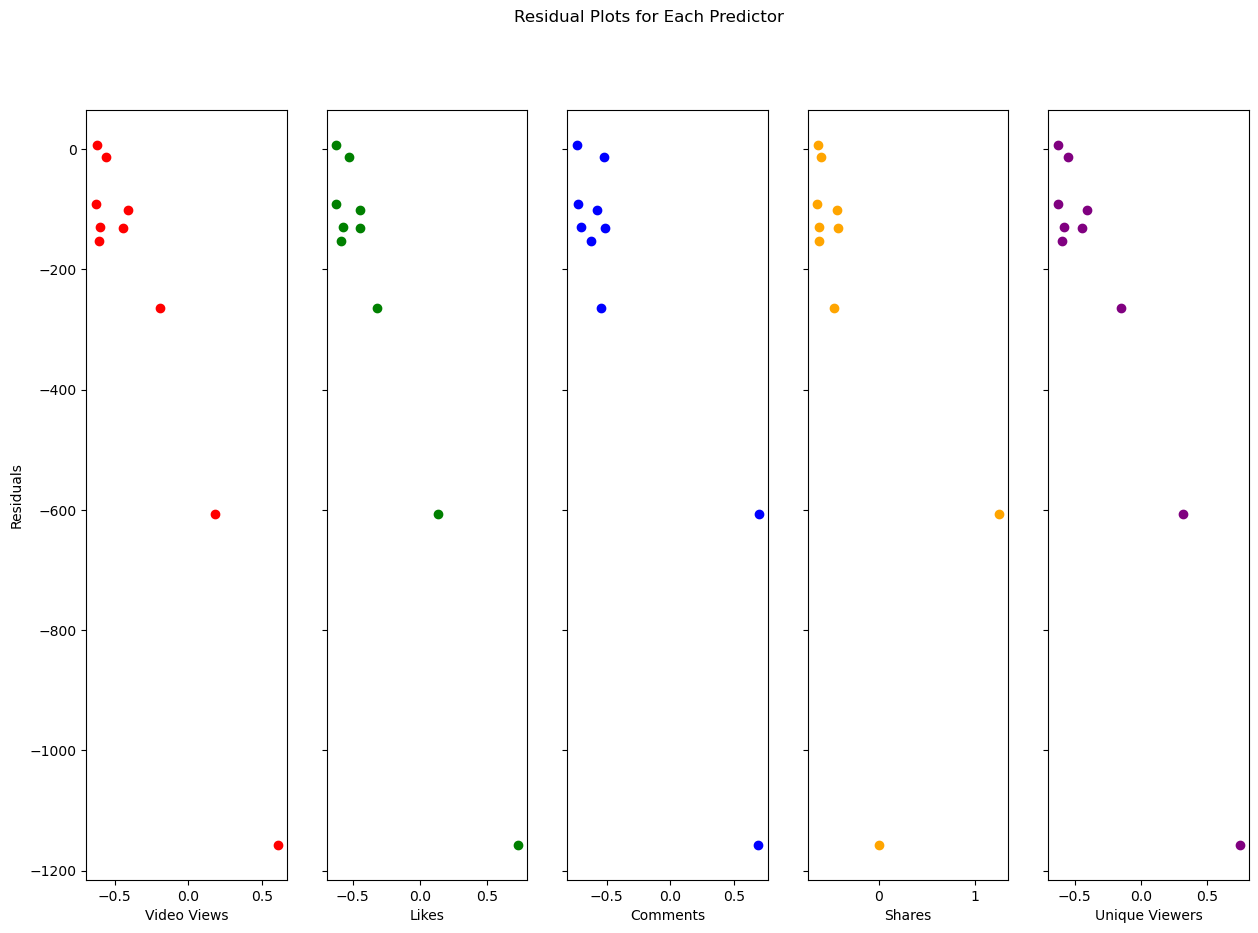

In [89]:

residuals = y_test - y_pred

fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(15, 10), sharey = True)

ax1.scatter(x_test['Video Views'],residuals, color = 'red')
ax2.scatter(x_test['Likes'], residuals, color = 'green')
ax3.scatter(x_test['Comments'], residuals, color= 'blue')
ax4.scatter(x_test['Shares'], residuals, color = 'orange')
ax5.scatter(x_test['Unique Viewers'], residuals, color = 'purple')

ax1.set_ylabel('Residuals')
ax1.set_xlabel('Video Views')
ax2.set_xlabel('Likes')
ax3.set_xlabel('Comments')
ax4.set_xlabel('Shares')
ax5.set_xlabel('Unique Viewers')

fig1.suptitle('Residual Plots for Each Predictor')


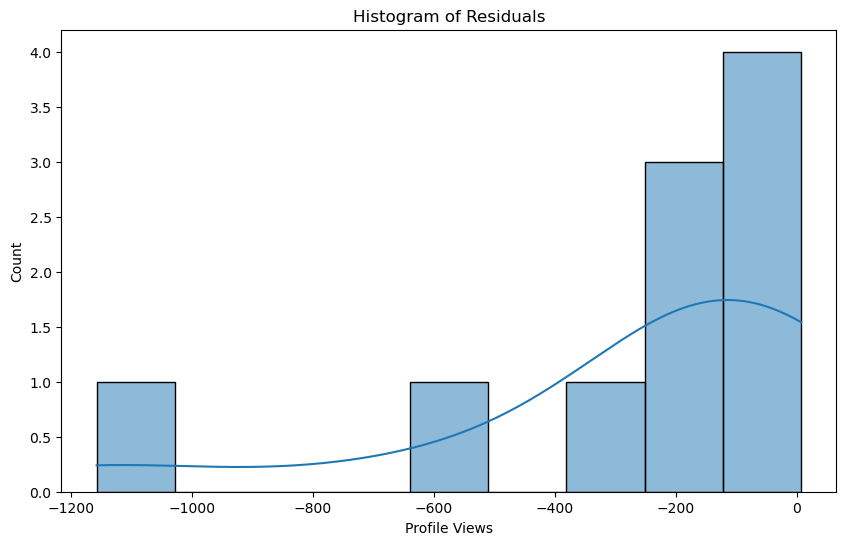

In [94]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.savefig('Histogram of Residuals.png')